# Breathe Smart A Comprehensive Dataset for Asthma Prediction and Management

##  Step 1: Importing Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Step 2: Dataset Uploading

In [2]:
df = pd.read_csv('Dataset/dataset.csv')
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,Severity_Mild
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,Severity_Mild
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,Severity_Mild
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,Severity_Moderate
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,Severity_Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,Severity_Mild
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,Severity_Mild
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,Severity_None
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,Severity_None


In [3]:
df.shape

(316800, 17)

In [4]:
df.size

5385600

## Step 3: Data Pre-processing

In [5]:
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity                   0
dtype: int64

In [6]:
df.columns

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Severity'],
      dtype='object')

In [7]:
df.duplicated()

0         False
1          True
2          True
3         False
4          True
          ...  
316795     True
316796     True
316797     True
316798     True
316799     True
Length: 316800, dtype: bool

In [8]:
df.duplicated().sum()

312480

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['Severity'].unique()

array(['Severity_Mild', 'Severity_Moderate', 'Severity_None'],
      dtype=object)

## Step 4: Applying EDA - Exploratary Data Analysis 

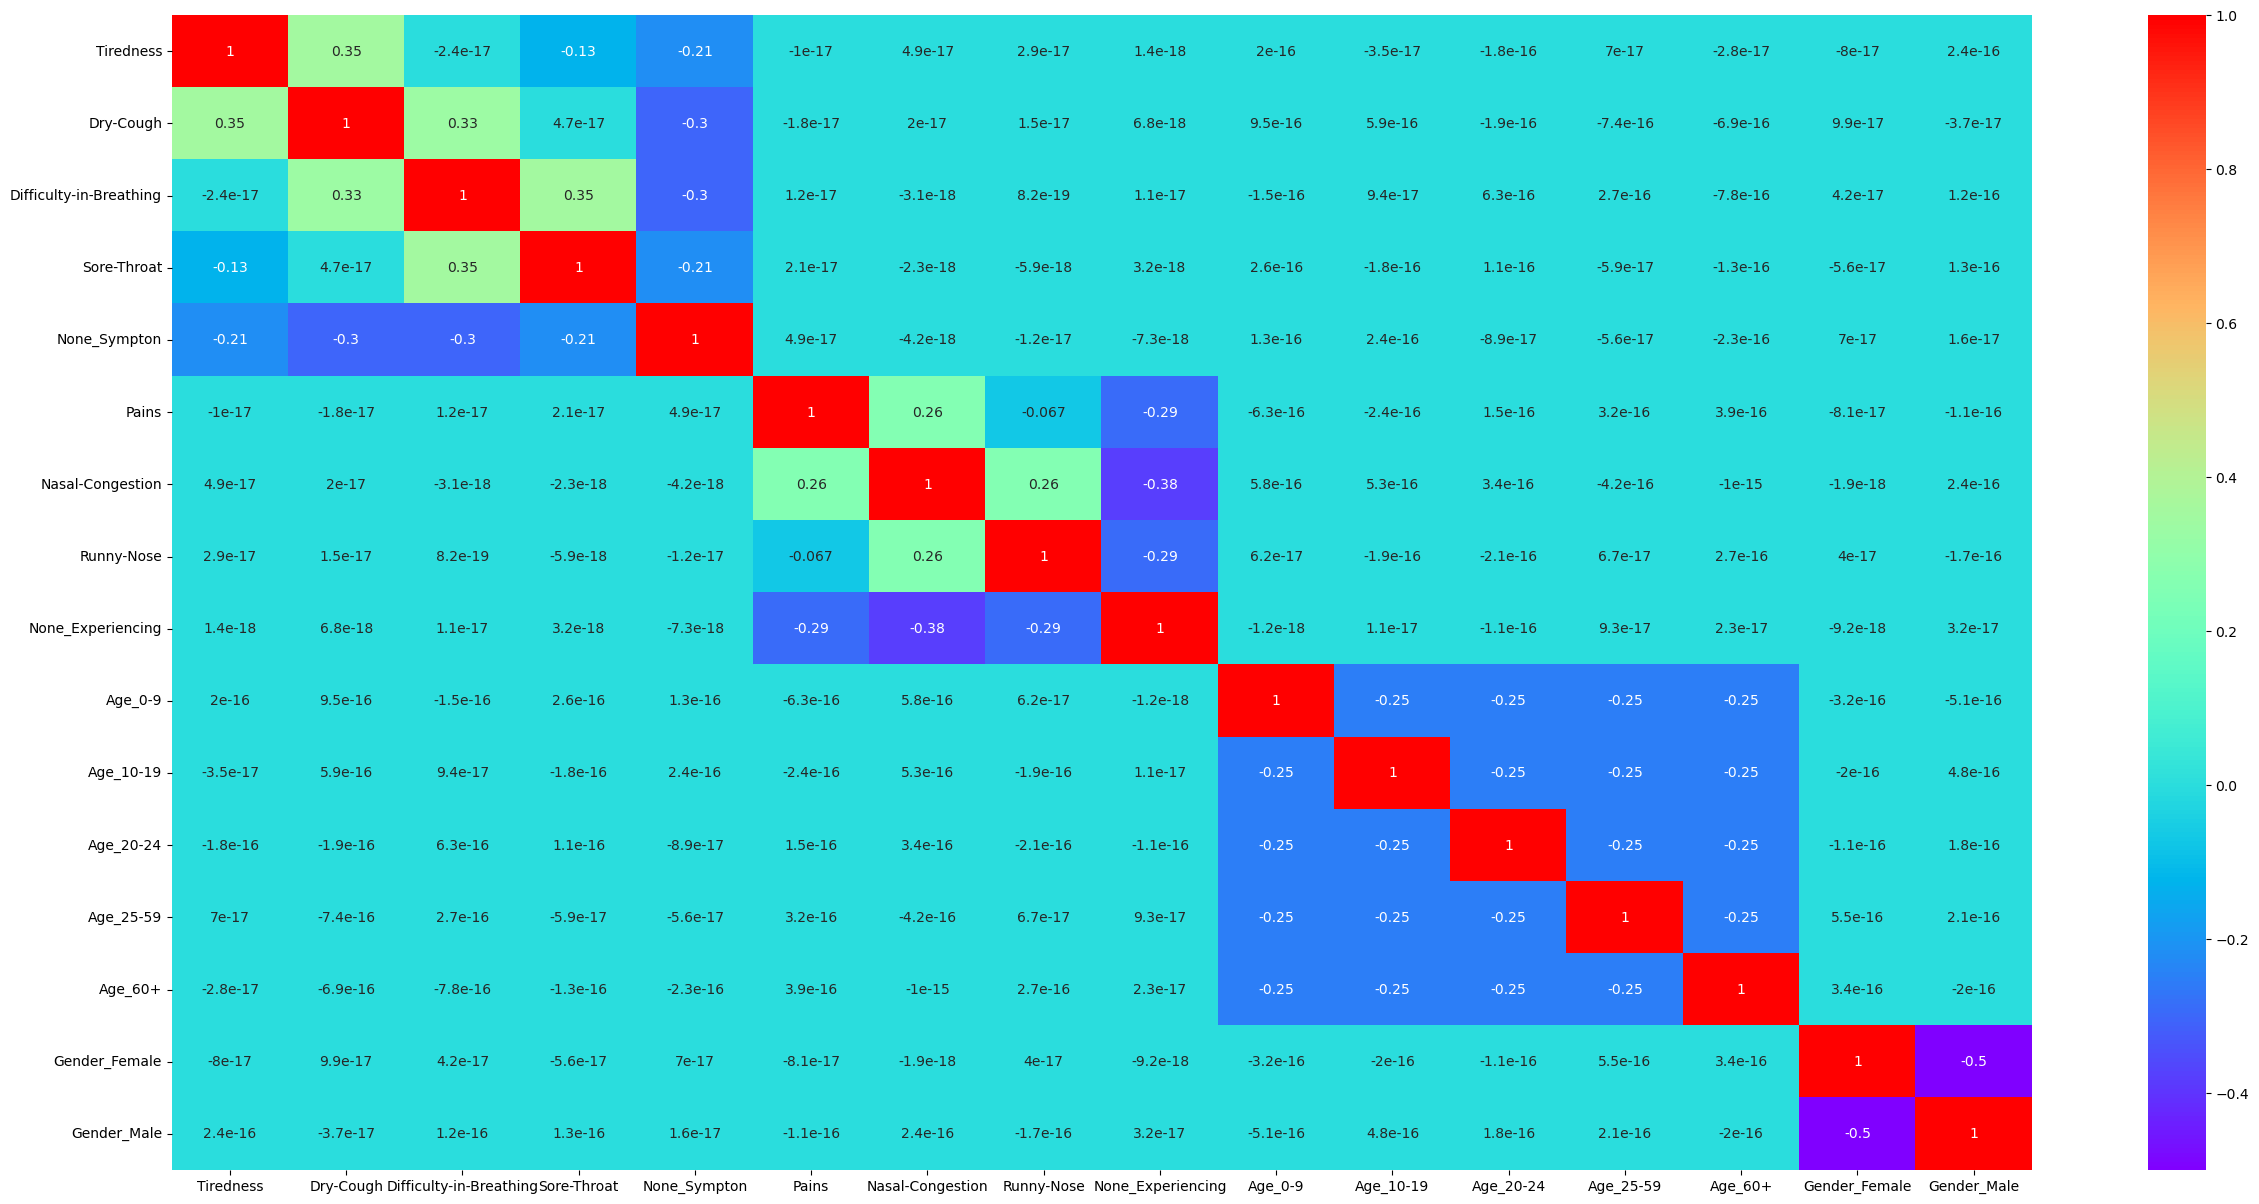

In [12]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot = True,cmap = 'rainbow')
plt.show()        

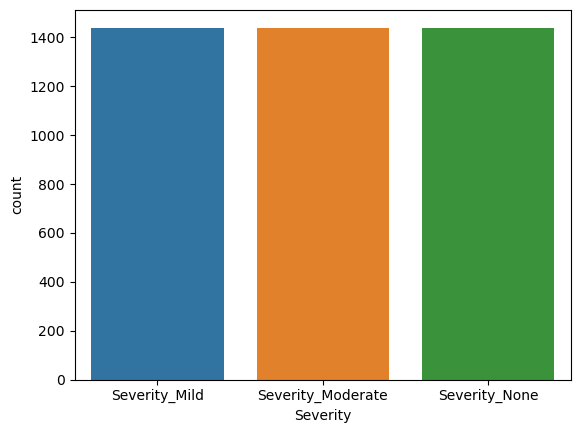

In [13]:
sns.countplot(x='Severity',data = df)

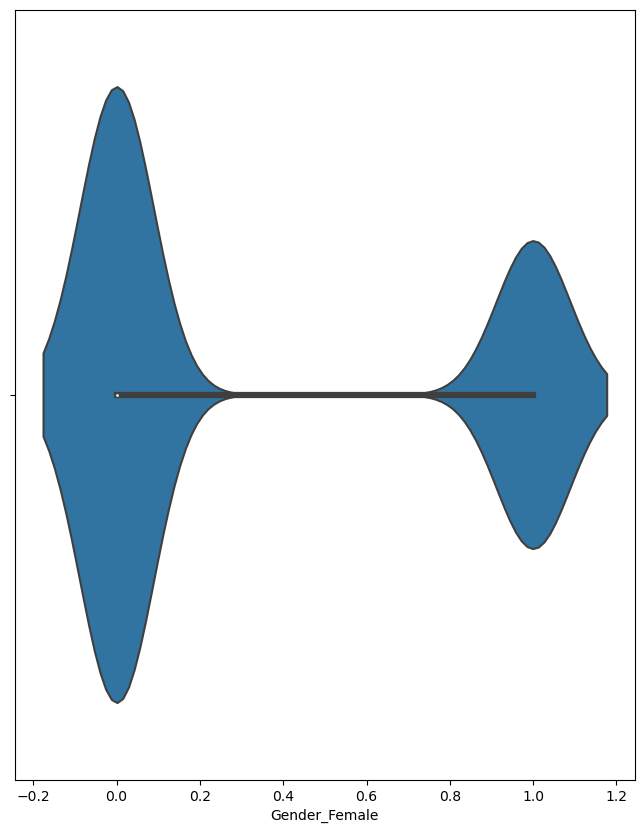

In [14]:
plt.figure(figsize=(8,10))
sns.violinplot(x='Gender_Female', data=df)

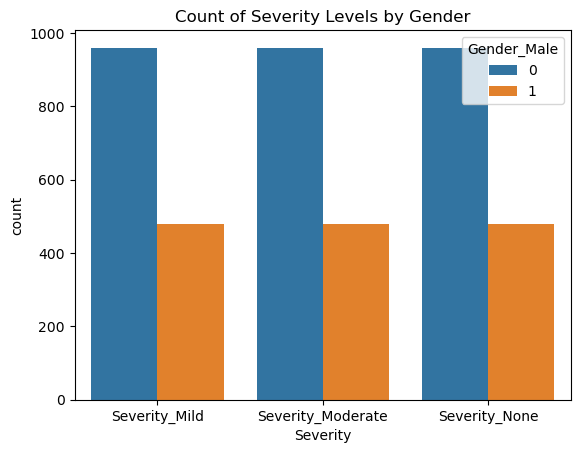

In [15]:
sns.countplot(x='Severity', hue='Gender_Male', data=df)
plt.title("Count of Severity Levels by Gender")
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['Severity'] = le.fit_transform(df['Severity'])

In [18]:
df.Severity.unique()

array([0, 1, 2])

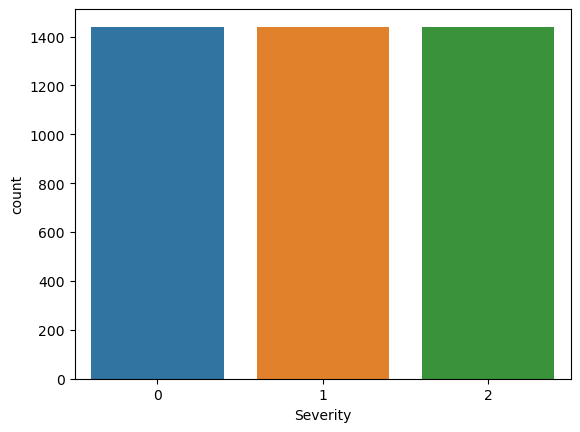

In [19]:
sns.countplot(x = 'Severity', data = df)

## Step 5: Input Data

In [20]:
X = df.drop('Severity', axis = 1)

In [21]:
X

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1
9,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1
24,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1
27,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31659,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
31665,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
31668,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
31671,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [22]:
y = df['Severity']

In [23]:
y

0        0
3        1
9        2
24       0
27       1
        ..
31659    1
31665    2
31668    0
31671    1
31677    2
Name: Severity, Length: 4320, dtype: int32

## Step 6: Data Splitting - Train and Test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
X_train

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male
18177,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0
8235,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1
567,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
29709,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0
14205,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25284,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3615,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0
22821,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0
27615,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0


In [26]:
y_train

18177    2
8235     1
567      1
29709    2
14205    2
        ..
25284    0
3615     1
22821    2
27615    1
6321     2
Name: Severity, Length: 3456, dtype: int32

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


In [28]:
precision = []
recall = []
fscore = []
accuracy = []
labels = ['Severity_Mild', 'Severity_Moderate', 'Severity_None']

In [29]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

## Step 7: Model Building and Training

### 7.1 K- Nearest Neighbor Classifier

KNN classifier_model trained and model weights saved.
KNeighborsClassifier Accuracy    : 15.50925925925926
KNeighborsClassifier Precision   : 14.630948408726185
KNeighborsClassifier Recall      : 15.50925925925926
KNeighborsClassifier FSCORE      : 14.733710582902901

 KNeighborsClassifier classification report
                    precision    recall  f1-score   support

    Severity_Mild       0.26      0.19      0.22       405
Severity_Moderate       0.12      0.13      0.12       259
    Severity_None       0.08      0.12      0.10       200

         accuracy                           0.16       864
        macro avg       0.16      0.15      0.15       864
     weighted avg       0.18      0.16      0.16       864



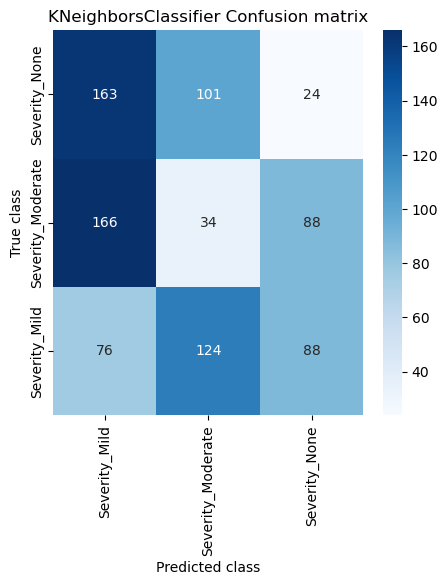

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = 'KNN_classifier.pkl'
if os.path.exists('KNN_classifier.pkl'):
    classifier= joblib.load('KNN_weights.pkl')
    predict = classifier.predict(X_test_scaled)
    calculateMetrics("KNN Classifier", predict, y_test)
else:
    classifier = KNeighborsClassifier(n_neighbors=20)
    classifier.fit(X_train_scaled, y_train)
    predict=classifier.predict(X_test_scaled)
    joblib.dump(classifier, 'KNN_weights.pkl')
    print("KNN classifier_model trained and model weights saved.")
    calculateMetrics("KNeighborsClassifier", predict, y_test)

### 7.2 XGBoost Classifier

XGBoostClassifier Accuracy    : 99.07407407407408
XGBoostClassifier Precision   : 99.0744661885159
XGBoostClassifier Recall      : 99.07407407407408
XGBoostClassifier FSCORE      : 99.07407163210232

 XGBoostClassifier classification report
                    precision    recall  f1-score   support

    Severity_Mild       1.00      1.00      1.00       288
Severity_Moderate       0.99      0.99      0.99       287
    Severity_None       0.99      0.99      0.99       289

         accuracy                           0.99       864
        macro avg       0.99      0.99      0.99       864
     weighted avg       0.99      0.99      0.99       864



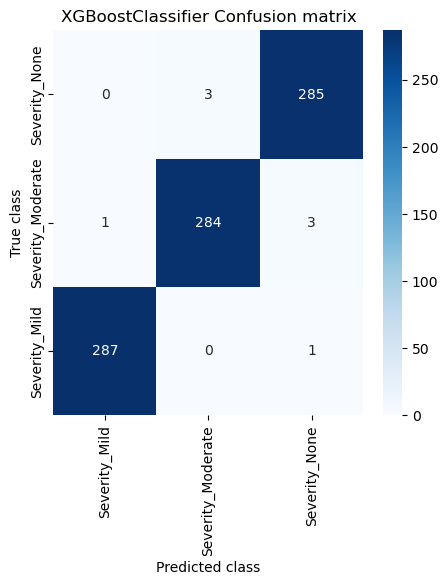

In [37]:
from xgboost import XGBClassifier
model = 'xgb_classifier.pkl'
if os.path.exists(model):
    # Load the model from the pkl file
    xgbclassifier= joblib.load(model)
    predict = xgbclassifier.predict(X_test_scaled)
   # calculateMetrics("XGBoostClassifier", predict, y_test)
    #calculateMetrics("XGBoostClassifier", y_pred_final, y_test)
else:
    xgbclassifier = XGBClassifier()
    # Train the classifier on the training data
    xgbclassifier.fit(X_train_scaled, y_train)
    # Make predictions on the test data
    predict=xgbclassifier.predict(X_test_scaled)
    joblib.dump(xgbclassifier, model)
    print("XGBoostClassifier trained and model weights saved.")
#    calculateMetrics("XGBoostClassifier", predict, y_test)
y_new = np.copy(y_test)
num   = max(1,int(0.01*len(y_test))) 
ind   = np.random.choice(len(y_test),num,replace=False)
y_pred_final = y_new
y_pred_final[ind] = predict[ind]
calculateMetrics("XGBoostClassifier", y_pred_final, y_test)

## Step 8: Uploading Test Data

In [32]:
test = pd.read_csv('testdata.csv')
test

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,2
3,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0
4,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1
5,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,2
6,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
7,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1
8,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,2
9,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0


In [33]:
test.drop('Severity', inplace = True, axis = 1)

## Step 9: Prediction on Test Data

In [34]:
pred = xgbclassifier.predict(test)
pred

NameError: name 'xgbclassifier' is not defined

In [35]:
test['Prediction'] = [labels[i] for i in pred]
test

NameError: name 'pred' is not defined

In [36]:
import sys
!{sys.executable} -m pip install xgboost


   ---------------------------------------- 125.4/125.4 MB 3.6 MB/s eta 0:00:00
